### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:

### Objetivos:

* Generar un corpus con todos los documentos. 

* Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

* Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras? 

* Hacer lo mismo con n-gramas.

* Visualizar la frecuencia de palabras en una nube de palabras.

* Elaborar una breve conclusión de lo encontrado

Fecha de Entrega: 6 de junio de 2021

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [12]:
root=os.getcwd()
dirname=f'{root}\\Documentos'

In [13]:

def getListOfFiles(dirName, quantity=None):
    # create a list of file and sub directories 
    # names in the given directory
    files = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    if not quantity:
        for file in files:
            # Create full path
            fullPath = dirName + "\\" + file
            # If entry is a directory then get the list of files in this directory 
            if os.path.isdir(fullPath) and not quantity:
                allFiles = allFiles + getListOfFiles(fullPath)
            else:
                allFiles.append(fullPath)
    else:
        allFiles = allFiles + getListOfFiles(dirName)[:quantity]
    return allFiles


def create_corpus(file_list):
    corpus=[]
    for file in file_list:
        f = open (file,'r', encoding="utf8")
        corpus.append(f.read())
    corpus=','. join(corpus)
    return corpus


def corpus_for_fuero(fuero):
    path_fuero=f'{dirname}\{fuero}'
    files = os.listdir(path_fuero)
    corpus=[]
    for file in files:
        path=f'{path_fuero}\{file}'
        f = open (path,'r', encoding="utf8")
        corpus.append(f.read())
    corpus=','. join(corpus)
    return corpus,files

def saveTxt(text, textFilename):
    textFile = open(textFilename, "w", encoding="utf-8")
    textFile.write(text)
    textFile.close()
    
    
def graph_frequency(dataframe):
    plt.figure(figsize=(10,6))
    sns.barplot(x=dataframe[:15].Token, y=dataframe[:15].Frecuencia, color='skyblue')
    plt.xticks(rotation=90)
    sns.despine()

def obtain_tokens_and_dataframe(corpus):
    tokens=[t for t in corpus.split()]
    freq = nltk.FreqDist(tokens)
    data = pd.DataFrame(freq.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
    return data

En esta celda guardamos todas las funciones que iremos utilizando a lo largo de la notebook, con el fin de que sean reutilizables

**Ejercicio 1**
Generar un corpus con todos los documentos.

In [14]:
files_list=getListOfFiles(dirname)


full_corpus=create_corpus(files_list)

fileDestino = 'Corpus'
saveTxt(full_corpus, fileDestino + ".txt")

**Ejercicio 2** Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf.

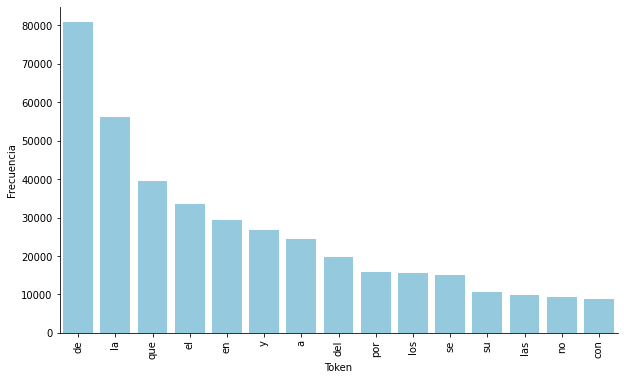

In [15]:
import nltk

full_data=obtain_tokens_and_dataframe(full_corpus)
graph_frequency(full_data)



Aqui podemos ver que se cumple en rasgos generales la ley de Zipf de que la frecuencia de palabras tiene una distribucion decreciente exponencial.
Y las palabras mas frecuentes son articulos, por lo que habria que realizar una limpieza para obtener palabras que aporten mayor informacion

**Ejercicio 3** Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras?

In [16]:
#Ejercicio 3
print('Tokens mas frecuentes')
display(full_data[:10])
print('Tokens menos frecuentes')
display(full_data[-10:])

Tokens mas frecuentes


,Token,Frecuencia
6,de,80830
62,la,56153
55,que,39528
90,el,33672
78,en,29487
35,y,26680
47,a,24418
31,del,19777
132,por,15979
54,los,15547


Tokens menos frecuentes


,Token,Frecuencia
37206,21/10/09,1
37209,verifica.,1
37212,26-29,1
37219,"""BAEZ",1
37220,"3240353,",1
37221,"112/16,",1
37222,Grasso,1
37223,"18-,",1
37224,103/109,1
67818,y551,1


Analisis del fuero familia

Corpus total del fuero

,Token,Frecuencia
6,de,38517
62,la,27210
55,que,19778
90,el,16588
78,en,13244
35,y,12679
47,a,11058
31,del,9160
54,los,8071
132,por,7916


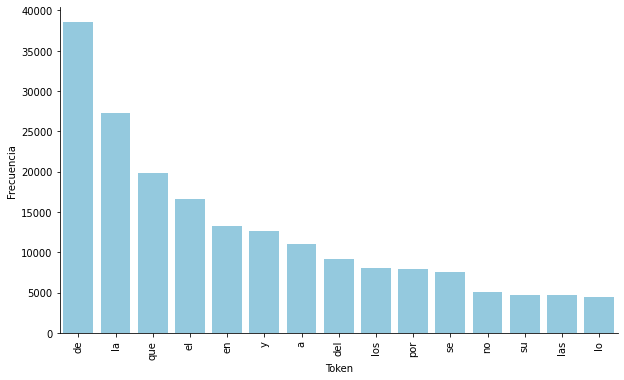

In [17]:
corpus_familia, files_familia=corpus_for_fuero('FAMILIA')
data_familia=obtain_tokens_and_dataframe(corpus_familia)
graph_frequency(data_familia)
data_familia[:10]

Analisis de 5 archivos del fuero

,Token,Frecuencia
6,de,1455
62,la,1009
55,que,777
90,el,747
78,en,597
47,a,509
35,y,498
31,del,416
168,se,352
54,los,330


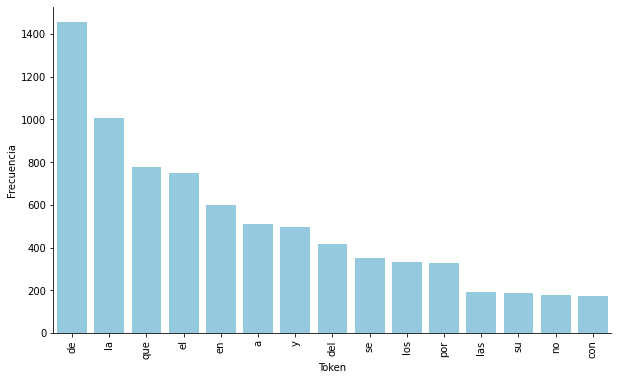

In [18]:
list_of_five_files_familia=getListOfFiles(dirname+ '\FAMILIA', 5)
corpus_five_familia=create_corpus(list_of_five_files_familia)
data_five_familia=obtain_tokens_and_dataframe(corpus_five_familia)
graph_frequency(data_five_familia)
data_five_familia[:10]

Analisis del fuero laboral

Corpus total del fuero

,Token,Frecuencia
6,de,3578
39,la,3306
108,el,1902
103,que,1675
35,en,1595
61,a,1423
54,y,1175
42,del,1088
83,por,1018
37,los,721


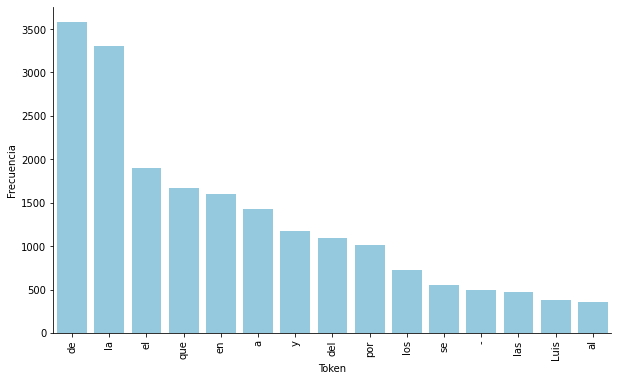

In [19]:
corpus_laboral,files_laboral=corpus_for_fuero('LABORAL')
data_laboral=obtain_tokens_and_dataframe(corpus_laboral)
graph_frequency(data_laboral)
data_laboral[:10]

Analisis de 5 archivos del fuero

,Token,Frecuencia
6,de,631
39,la,526
108,el,276
103,que,259
35,en,258
61,a,231
54,y,216
42,del,179
83,por,156
37,los,141


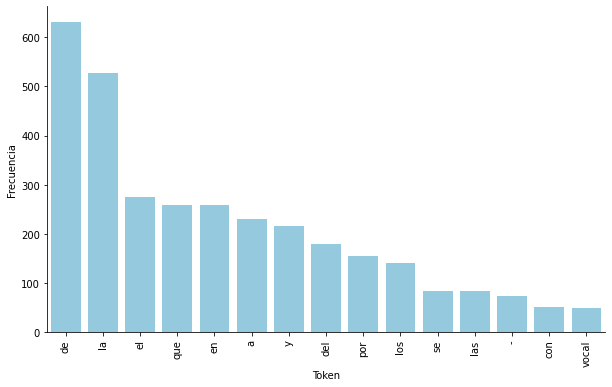

In [20]:
list_of_five_files_laboral=getListOfFiles(dirname+'\LABORAL', 5)
corpus_five_laboral=create_corpus(list_of_five_files_laboral)
data_five_laboral=obtain_tokens_and_dataframe(corpus_five_laboral)
graph_frequency(data_five_laboral)
data_five_laboral[:10]

Analisis del fuero menores

Corpus total del fuero

,Token,Frecuencia
10,de,13527
11,la,8882
16,y,5017
142,que,4886
56,el,4370
108,en,4337
99,a,4294
64,del,2994
115,los,2372
217,su,2283


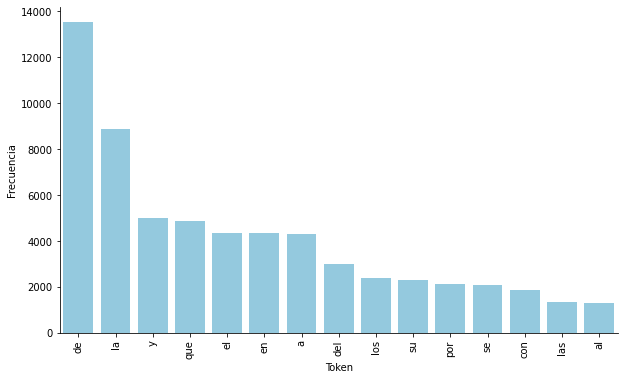

In [21]:
corpus_menores,files_menores=corpus_for_fuero('MENORES')
data_menores=obtain_tokens_and_dataframe(corpus_menores)
graph_frequency(data_menores)
data_menores[:10]

Analisis de 5 archivos del fuero

,Token,Frecuencia
10,de,3311
11,la,2175
16,y,1329
142,que,1280
56,el,1251
99,a,1153
108,en,1126
64,del,878
115,los,649
217,su,578


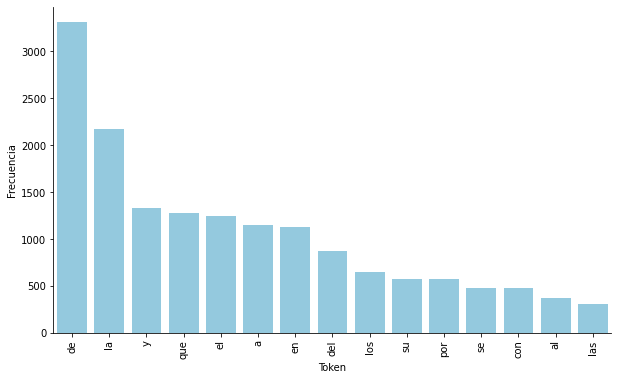

In [22]:
list_of_five_files_menores=getListOfFiles(dirname+ '\MENORES', 5)
corpus_five_menores=create_corpus(list_of_five_files_menores)
data_five_menores=obtain_tokens_and_dataframe(corpus_five_menores)
graph_frequency(data_five_menores)
data_five_menores[:10]

Analisis del fuero penal

Corpus total del fuero

,Token,Frecuencia
6,de,25208
32,la,16755
126,que,13189
60,el,10812
50,en,10311
74,y,7809
35,a,7643
39,del,6535
59,por,4902
48,se,4769


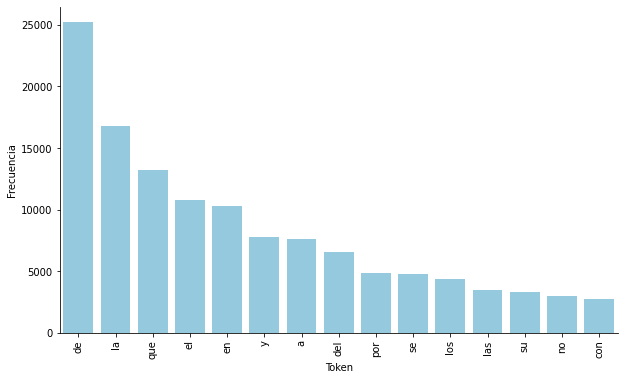

In [23]:
corpus_penal,files_penal=corpus_for_fuero('PENAL')
data_penal=obtain_tokens_and_dataframe(corpus_penal)
graph_frequency(data_penal)
data_penal[:10]

Analisis de 5 archivos del fuero

,Token,Frecuencia
6,de,5290
32,la,3590
126,que,3078
60,el,2338
50,en,2298
74,y,1746
35,a,1680
39,del,1349
48,se,1201
36,los,975


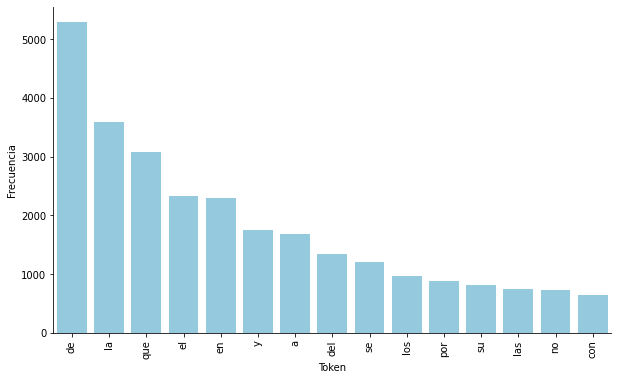

In [24]:
list_of_five_files_penal=getListOfFiles(dirname+ '\PENAL', 5)
corpus_five_penal=create_corpus(list_of_five_files_penal)
data_five_penal=obtain_tokens_and_dataframe(corpus_five_penal)
graph_frequency(data_five_penal)
data_five_penal[:10]

Por lo que vimos en los analisis de los 4 fueros en general, las palabras mas frecuentes se repiten en todos los fueros, ya que son articulos

**Ejercicio 4** Hacer lo mismo con n-gramas.

Analisis de bigramas del corpus

,Token,Frecuencia
413,"(de, la)",16840
356,"(a, la)",5950
137,"(en, el)",5112
59,"(de, los)",4564
583,"(en, la)",4178
...,...,...
158524,"(por, Fatlyf,)",1
158525,"(Fatlyf,, arribadas)",1
158526,"(arribadas, con)",1
158527,"(con, soluciones)",1


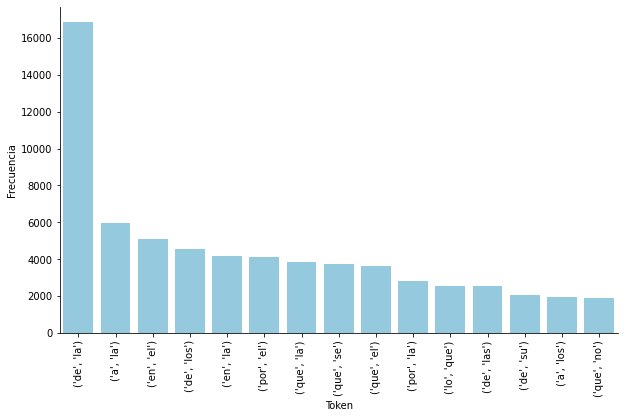

In [25]:
tokens =[t for t in full_corpus.split()]

bgs = nltk.bigrams(tokens)
fdist = nltk.FreqDist(bgs)


bigrams = pd.DataFrame(fdist.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams)
bigrams
#Existe tambien la funcion de nltk para trigramas

Se puede ver que los bigramas que mas se repiten, involucran la concatenacion de articulos

Analisis de bigramas del fuero Familias

,Token,Frecuencia
413,"(de, la)",8127
356,"(a, la)",2799
59,"(de, los)",2445
137,"(en, el)",2217
800,"(que, la)",2185
...,...,...
75708,"(DCR,, patrocinado)",1
75707,"(señor, DCR,)",1
75705,"(sentido,, compartiendo)",1
75704,"(cumplir., En)",1


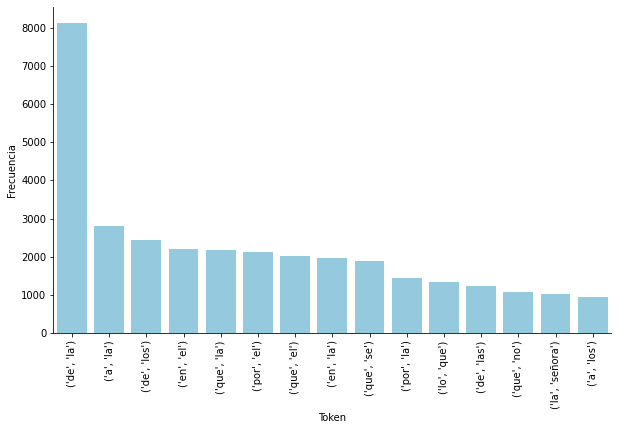

In [26]:
tokens_familia =[t for t in corpus_familia.split()]

bgs_familia = nltk.bigrams(tokens_familia)
fdist_familia = nltk.FreqDist(bgs_familia)


bigrams_familia = pd.DataFrame(fdist_familia.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams_familia)
bigrams_familia

,Token,Frecuencia
413,"(de, la)",308
137,"(en, el)",115
356,"(a, la)",103
800,"(que, la)",92
106,"(que, el)",88
...,...,...
5440,"(7/3/2018., Córdoba,)",1
5441,"(Córdoba,, siete)",1
5442,"(siete, de)",1
5443,"(de, marzo)",1


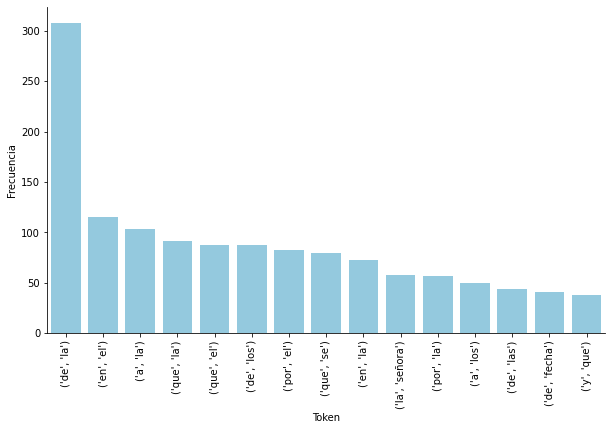

In [27]:
tokens_familia_5 =[t for t in corpus_five_familia.split()]

bgs_familia_5 = nltk.bigrams(tokens_familia_5)
fdist_familia_5 = nltk.FreqDist(bgs_familia_5)


bigrams_familia_5 = pd.DataFrame(fdist_familia_5.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams_familia_5)
bigrams_familia_5

Analisis de bigramas del fuero Laboral

,Token,Frecuencia
44,"(de, la)",1074
99,"(a, la)",462
135,"(en, la)",312
142,"(en, el)",308
592,"(señor, vocal)",243
...,...,...
10529,"(sustentar, su)",1
10527,"(jurisprudencia, para)",1
10525,"(económico., Cita)",1
10524,"(perjuicio, económico.)",1


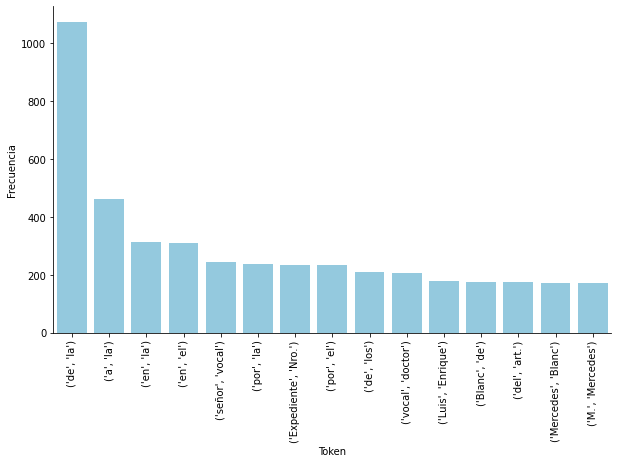

In [28]:
tokens_laboral =[t for t in corpus_laboral.split()]

bgs_laboral = nltk.bigrams(tokens_laboral)
fdist_laboral = nltk.FreqDist(bgs_laboral)


bigrams_laboral = pd.DataFrame(fdist_laboral.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams_laboral)
bigrams_laboral

,Token,Frecuencia
44,"(de, la)",184
99,"(a, la)",65
135,"(en, la)",54
142,"(en, el)",53
71,"(de, los)",43
...,...,...
2544,"(anotadas-, que)",1
2543,"(-ya, anotadas-)",1
2542,"(particularidades, -ya)",1
2540,"(desproporcionado, a)",1


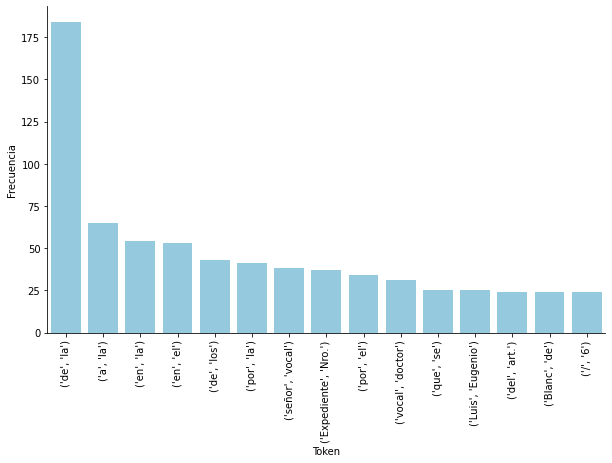

In [29]:
tokens_laboral_5 =[t for t in corpus_five_laboral.split()]

bgs_laboral_5 = nltk.bigrams(tokens_laboral_5)
fdist_laboral_5 = nltk.FreqDist(bgs_laboral_5)


bigrams_laboral_5 = pd.DataFrame(fdist_laboral_5.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams_laboral_5)
bigrams_laboral_5

Analisis de bigramas del fuero Menores

,Token,Frecuencia
11,"(de, la)",2920
126,"(a, la)",1079
137,"(en, el)",747
177,"(de, los)",674
422,"(en, la)",535
...,...,...
33128,"(viajar, con)",1
33130,"(otra, provincia)",1
33131,"(provincia, por)",1
33132,"(las, vacaciones)",1


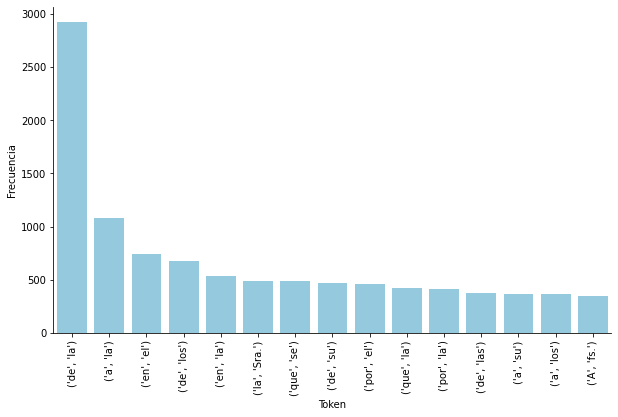

In [30]:
tokens_menores =[t for t in corpus_menores.split()]

bgs_menores = nltk.bigrams(tokens_menores)
fdist_menores = nltk.FreqDist(bgs_menores)


bigrams_menores = pd.DataFrame(fdist_menores.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams_menores)
bigrams_menores

,Token,Frecuencia
11,"(de, la)",732
126,"(a, la)",287
137,"(en, el)",190
177,"(de, los)",185
422,"(en, la)",150
...,...,...
10699,"(., “…)",1
10682,"(C.N., “tener)",1
10681,"(C.C.y, C.N.)",1
10679,"(podrá, por)",1


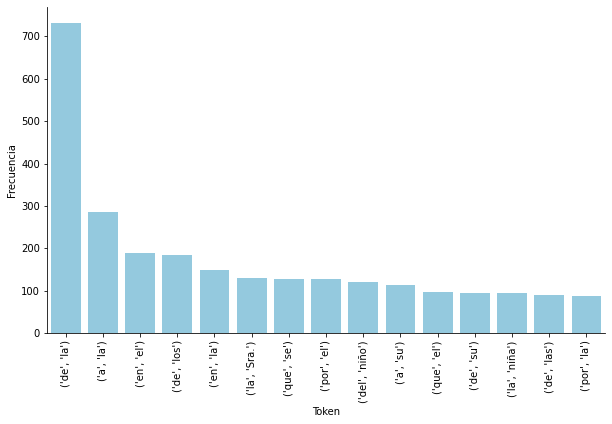

In [31]:
tokens_menores_5 =[t for t in corpus_five_menores.split()]

bgs_menores_5 = nltk.bigrams(tokens_menores_5)
fdist_menores_5 = nltk.FreqDist(bgs_menores_5)


bigrams_menores_5 = pd.DataFrame(fdist_menores_5.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams_menores_5)
bigrams_menores_5

Analisis de bigramas del fuero Penal

,Token,Frecuencia
338,"(de, la)",4719
201,"(en, el)",1840
308,"(a, la)",1610
268,"(en, la)",1369
71,"(por, el)",1330
...,...,...
63954,"(514,, 12/12/2017).)",1
63953,"(“Argüello”,, A.)",1
63952,"(11/7/2017;, “Argüello”,)",1
63951,"(287,, 11/7/2017;)",1


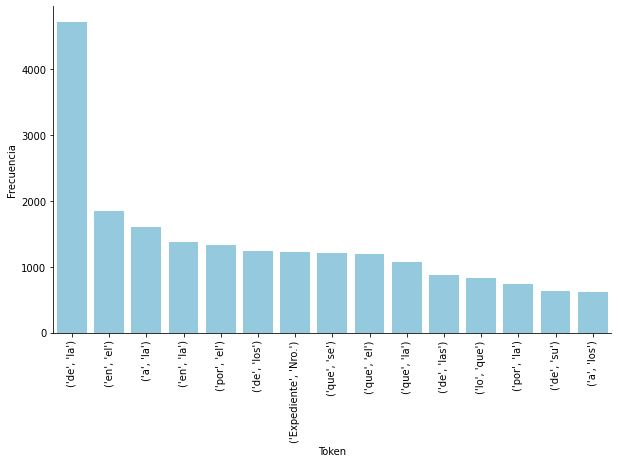

In [32]:
tokens_penal =[t for t in corpus_penal.split()]

bgs_penal = nltk.bigrams(tokens_penal)
fdist_penal = nltk.FreqDist(bgs_penal)


bigrams_penal = pd.DataFrame(fdist_penal.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams_penal)
bigrams_penal

,Token,Frecuencia
338,"(de, la)",981
201,"(en, el)",443
268,"(en, la)",334
308,"(a, la)",317
681,"(de, los)",306
...,...,...
18363,"(ocurrió,, explican,)",1
18362,"(ello, ocurrió,)",1
18361,"(5., Pero)",1
18359,"(certificaciones, del)",1


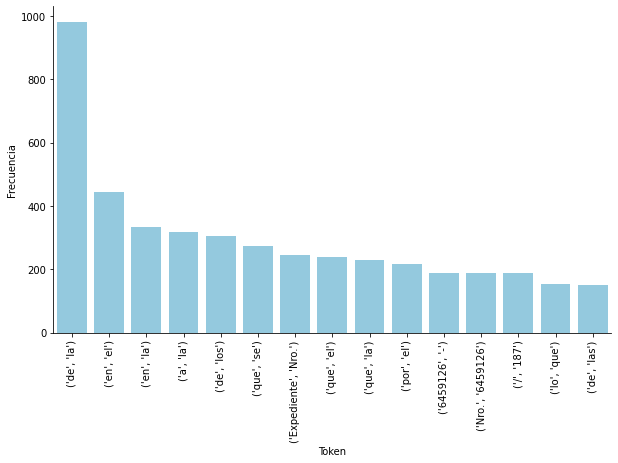

In [33]:
tokens_penal_5 =[t for t in corpus_five_penal.split()]

bgs_penal_5 = nltk.bigrams(tokens_penal_5)
fdist_penal_5 = nltk.FreqDist(bgs_penal_5)


bigrams_penal_5 = pd.DataFrame(fdist_penal_5.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(bigrams_penal_5)
bigrams_penal_5

Analisis de trigramas del corpus

,Token,Frecuencia
530,"(por, lo, que)",817
8,"(de, dos, mil)",781
457,"(de, la, ley)",703
10359,"(de, la, Ley)",694
364,"(recurso, de, apelación)",586
...,...,...
268649,"(agravio,, en, cuanto)",1
268648,"(primer, agravio,, en)",1
268647,"(rechazo., a), Con)",1
268646,"(su, rechazo., a))",1


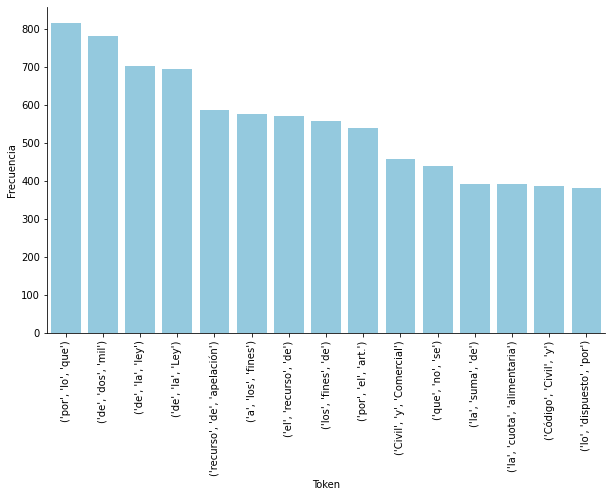

In [34]:
trigrams = nltk.trigrams(tokens)
fdist = nltk.FreqDist(trigrams)
trigram = pd.DataFrame(fdist.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram)
trigram

Analisis de trigramas del fuero Familias

,Token,Frecuencia
364,"(recurso, de, apelación)",571
530,"(por, lo, que)",531
8,"(de, dos, mil)",483
457,"(de, la, ley)",419
363,"(el, recurso, de)",396
...,...,...
123028,"(cuidado, unilateral, provisorio)",1
123029,"(unilateral, provisorio, de)",1
123030,"(provisorio, de, sus)",1
123031,"(hijos, al, momento)",1


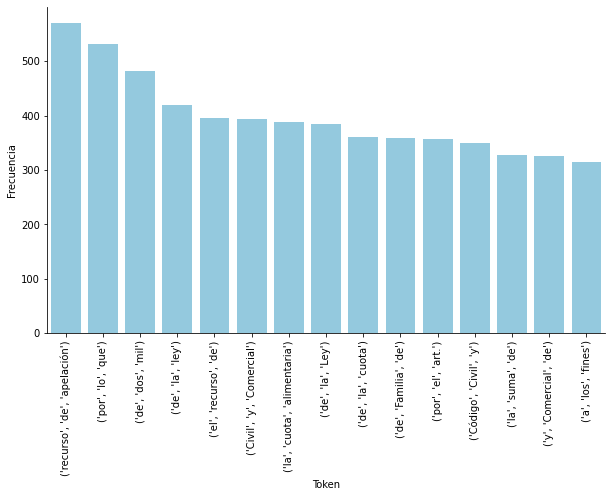

In [35]:
trigrams_familia = nltk.trigrams(tokens_familia)
fdist_familia = nltk.FreqDist(trigrams_familia)
trigram_familia = pd.DataFrame(fdist_familia.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram_familia)
trigram_familia

,Token,Frecuencia
3872,"(de, la, cuota)",23
364,"(recurso, de, apelación)",20
457,"(de, la, ley)",19
530,"(por, lo, que)",18
3873,"(la, cuota, alimentaria)",17
...,...,...
6626,"(documental:, María, Virginia)",1
6627,"(María, Virginia, Casaletti)",1
6628,"(Virginia, Casaletti, (redactora),)",1
6629,"(Casaletti, (redactora),, Juan)",1


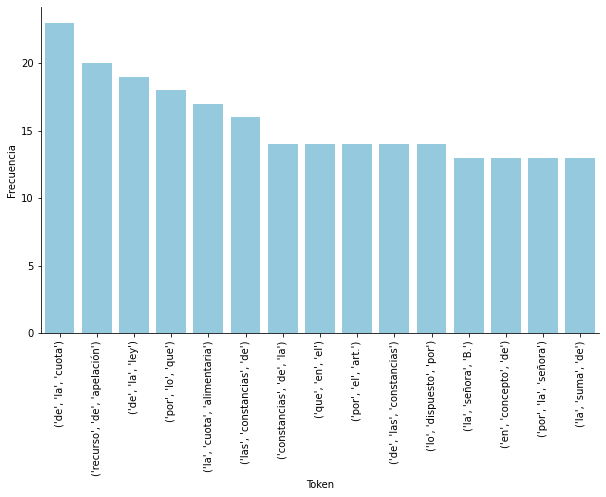

In [36]:
trigrams_familia_5 = nltk.trigrams(tokens_familia_5)
fdist_familia_5 = nltk.FreqDist(trigrams_familia_5)
trigram_familia_5 = pd.DataFrame(fdist_familia_5.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram_familia_5)
trigram_familia_5

Analisis de trigramas del fuero Laboral

,Token,Frecuencia
643,"(señor, vocal, doctor)",206
58,"(Mercedes, Blanc, de)",173
57,"(M., Mercedes, Blanc)",171
54,"(Luis, Enrique, Rubio,)",148
642,"(El, señor, vocal)",146
...,...,...
13643,"(o, s, definitivos…VIII)…)",1
13642,"(i, o, s)",1
13641,"(r, i, o)",1
13640,"(a, r, i)",1


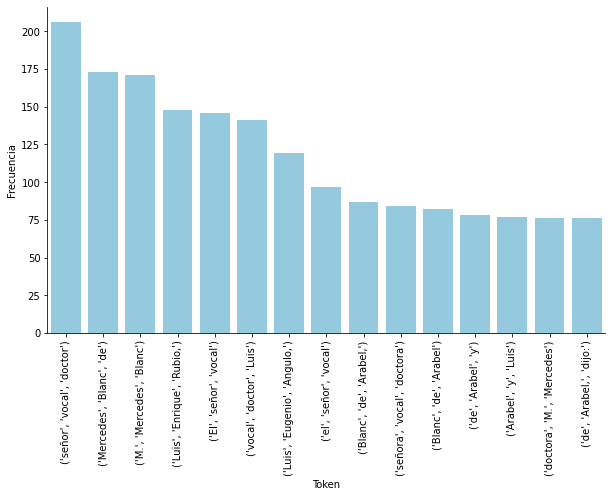

In [37]:
trigrams_laboral = nltk.trigrams(tokens_laboral)
fdist_laboral = nltk.FreqDist(trigrams_laboral)
trigram_laboral = pd.DataFrame(fdist_laboral.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram_laboral)
trigram_laboral

,Token,Frecuencia
643,"(señor, vocal, doctor)",31
58,"(Mercedes, Blanc, de)",23
642,"(El, señor, vocal)",22
57,"(M., Mercedes, Blanc)",22
644,"(vocal, doctor, Luis)",19
...,...,...
2963,"(Nº, 104/94), hasta)",1
2962,"(Sent, Nº, 104/94))",1
2961,"(Alex., Sent, Nº)",1
2960,"(Ros, Alex., Sent)",1


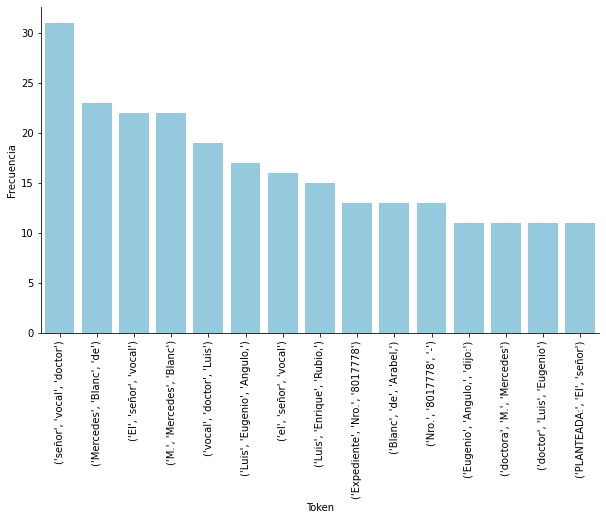

In [38]:
trigrams_laboral_5 = nltk.trigrams(tokens_laboral_5)
fdist_laboral_5 = nltk.FreqDist(trigrams_laboral_5)
trigram_laboral_5 = pd.DataFrame(fdist_laboral_5.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram_laboral_5)
trigram_laboral_5

Analisis de trigramas del fuero Menores

,Token,Frecuencia
144,"(de, la, Ley)",171
1663,"(de, la, medida)",164
703,"(a, fin, de)",151
929,"(de, la, Sra.)",150
2971,"(de, la, niña)",144
...,...,...
48360,"(dieciséis, formuló, denuncia)",1
48359,"(mil, dieciséis, formuló)",1
48358,"(cuatro, de, marzo)",1
48355,"(ello,, con, fecha)",1


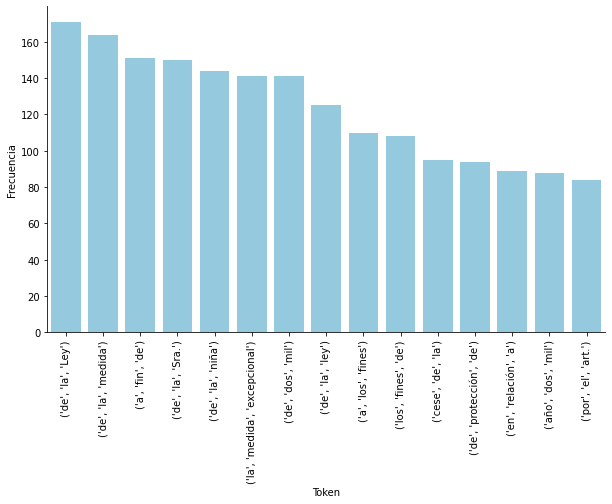

In [39]:
trigrams_menores = nltk.trigrams(tokens_menores)
fdist_menores = nltk.FreqDist(trigrams_menores)
trigram_menores = pd.DataFrame(fdist_menores.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram_menores)
trigram_menores

,Token,Frecuencia
2971,"(de, la, niña)",53
144,"(de, la, Ley)",48
703,"(a, fin, de)",43
929,"(de, la, Sra.)",41
9357,"(niño, F.,, M.)",34
...,...,...
13876,"(abiertamente, responsable, y)",1
13875,"(forma, abiertamente, responsable)",1
13874,"(de, forma, abiertamente)",1
13873,"(cuidado,, de, forma)",1


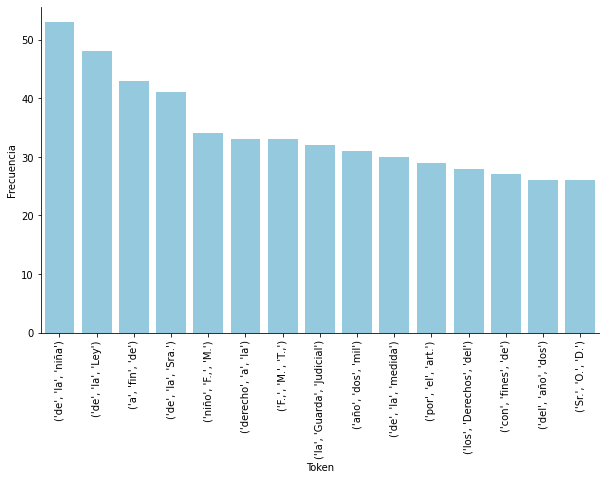

In [40]:
trigrams_menores_5 = nltk.trigrams(tokens_menores_5)
fdist_menores_5 = nltk.FreqDist(trigrams_menores_5)
trigram_menores_5 = pd.DataFrame(fdist_menores_5.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram_menores_5)
trigram_menores_5

Analisis de trigramas del fuero Penal

,Token,Frecuencia
231,"(La, señora, Vocal)",310
232,"(señora, Vocal, doctora)",286
2107,"(de, la, pena)",270
120,"(recurso, de, casación)",247
90,"(Marta, Cáceres, de)",218
...,...,...
95566,"(provocación, alguna, de)",1
95567,"(alguna, de, quien)",1
95569,"(quien, resultara, víctima,)",1
95570,"(resultara, víctima,, ni)",1


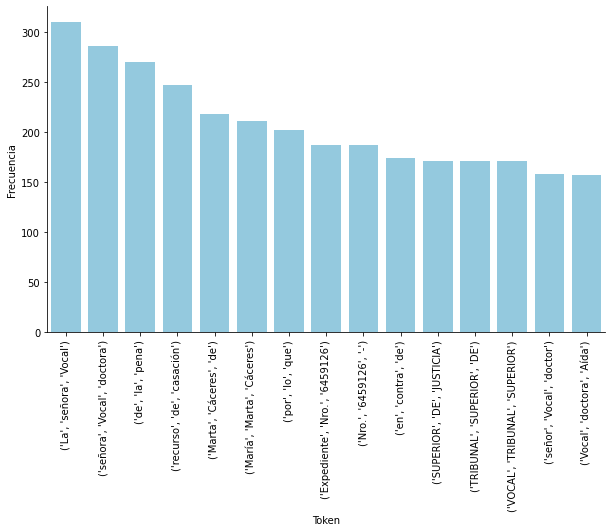

In [41]:
trigrams_penal = nltk.trigrams(tokens_penal)
fdist_penal = nltk.FreqDist(trigrams_penal)
trigram_penal = pd.DataFrame(fdist_penal.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram_penal)
trigram_penal

,Token,Frecuencia
2997,"(Nro., 6459126, -)",187
2996,"(Expediente, Nro., 6459126)",187
3412,"(del, cpo., de)",88
2107,"(de, la, pena)",73
3413,"(cpo., de, copia).)",71
...,...,...
24697,"(voluntaria, comisión, de)",1
24698,"(comisión, de, los)",1
24699,"(hechos, ilícitos, para)",1
24700,"(ilícitos, para, apropiarse)",1


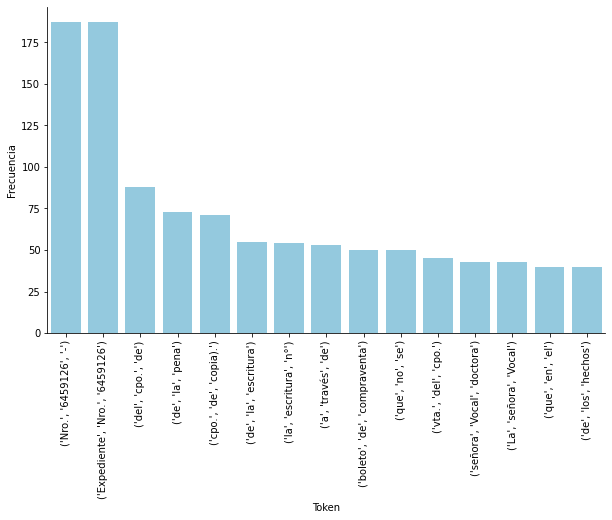

In [42]:
trigrams_penal_5 = nltk.trigrams(tokens_penal_5)
fdist_penal_5 = nltk.FreqDist(trigrams_penal_5)
trigram_penal_5 = pd.DataFrame(fdist_penal_5.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)
graph_frequency(trigram_penal_5)
trigram_penal_5

A la hora de analizar los bigramas pasa lo mismo que los tokens. En en el corpus total y en cada fuero en particular, predominan los artiulos o la union de los mismos. Quizas ya en en los trigramas hay una diferencia en los distintos fueros

**Ejercicio 5** Visualizar la frecuencia de palabras en una nube de palabras.

Analisis Corpus total

(-0.5, 399.5, 199.5, -0.5)

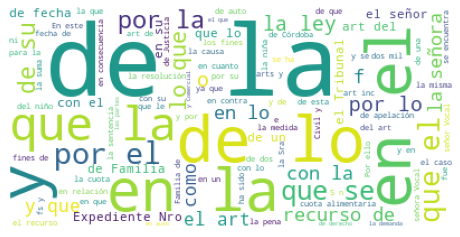

In [43]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=100).generate(full_corpus)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")

Analisis corpus familia

(-0.5, 399.5, 199.5, -0.5)

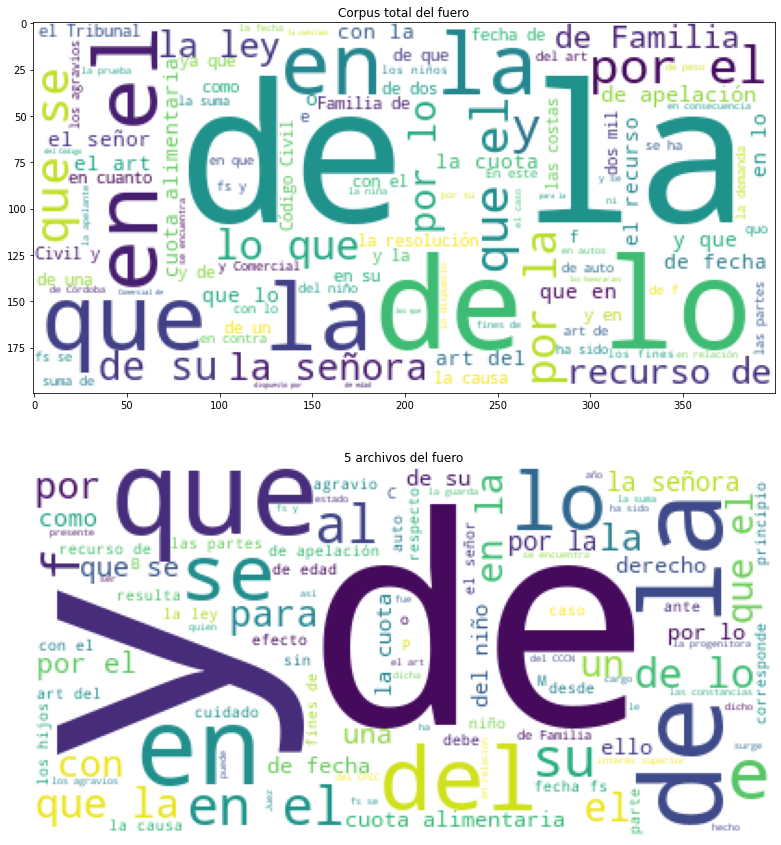

In [57]:
wordcloud_familia_full = WordCloud(background_color="white", max_words=100).generate(corpus_familia)
wordcloud_familia_five = WordCloud(background_color="white", max_words=100).generate(corpus_five_familia)

plt.figure(figsize=(15,15))
plt.subplot(211)
plt.title('Corpus total del fuero')
plt.imshow(wordcloud_familia_full)
plt.subplot(212)
plt.title('5 archivos del fuero')
plt.imshow(wordcloud_familia_five)
plt.axis("off")

Analisis fuero laboral

(-0.5, 399.5, 199.5, -0.5)

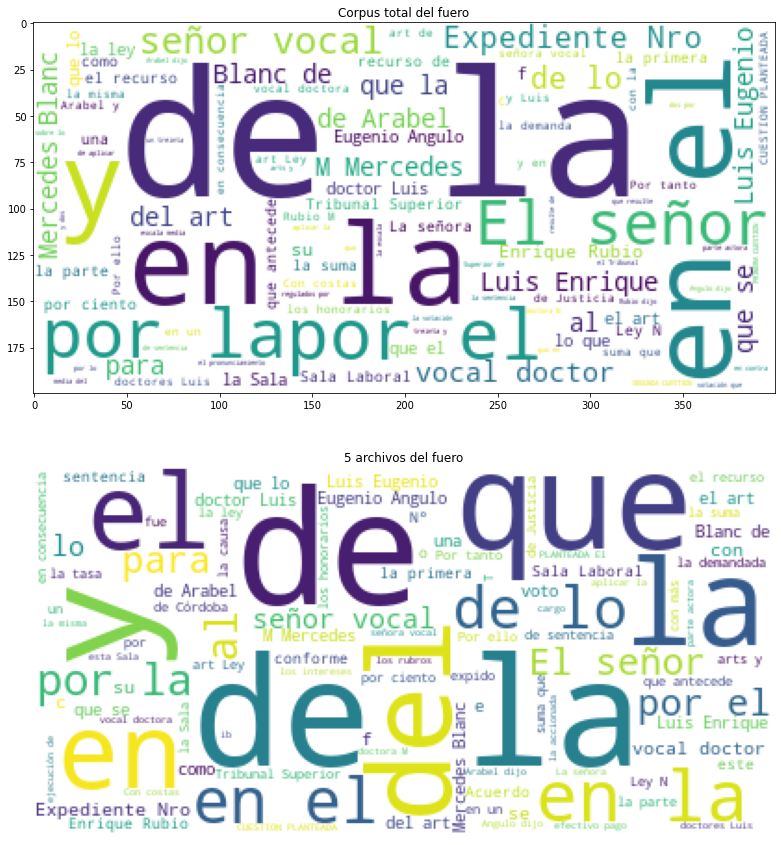

In [58]:
wordcloud_laboral_full = WordCloud(background_color="white", max_words=100).generate(corpus_laboral)
wordcloud_laboral_five = WordCloud(background_color="white", max_words=100).generate(corpus_five_laboral)

plt.figure(figsize=(15,15))
plt.subplot(211)
plt.title('Corpus total del fuero')
plt.imshow(wordcloud_laboral_full)
plt.subplot(212)
plt.title('5 archivos del fuero')
plt.imshow(wordcloud_laboral_five)
plt.axis("off")

Analisis fuero menores

(-0.5, 399.5, 199.5, -0.5)

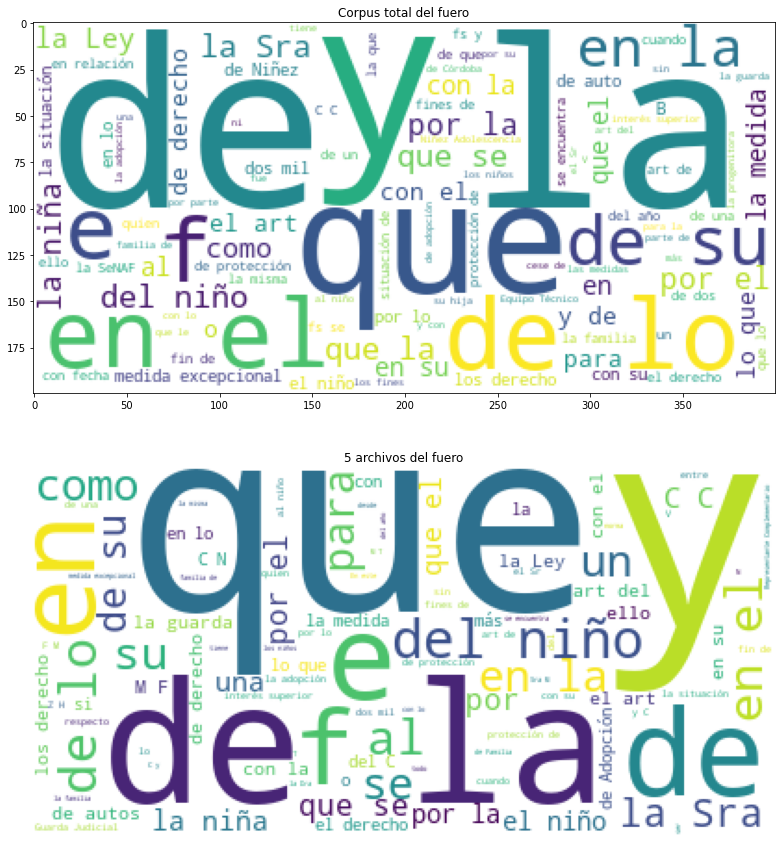

In [59]:
wordcloud_menores_full = WordCloud(background_color="white", max_words=100).generate(corpus_menores)
wordcloud_menores_five = WordCloud(background_color="white", max_words=100).generate(corpus_five_menores)

plt.figure(figsize=(15,15))
plt.subplot(211)
plt.title('Corpus total del fuero')
plt.imshow(wordcloud_menores_full)
plt.subplot(212)
plt.title('5 archivos del fuero')
plt.imshow(wordcloud_menores_five)
plt.axis("off")

Analisis fuero Penal

(-0.5, 399.5, 199.5, -0.5)

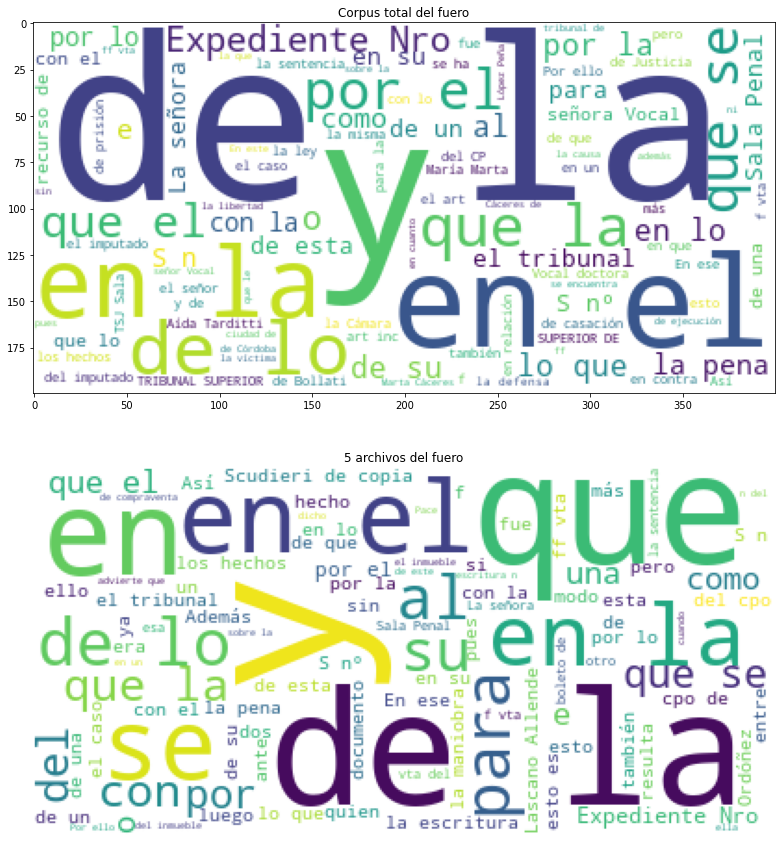

In [60]:
wordcloud_penal_full = WordCloud(background_color="white", max_words=100).generate(corpus_penal)
wordcloud_penal_five = WordCloud(background_color="white", max_words=100).generate(corpus_five_penal)

plt.figure(figsize=(15,15))
plt.subplot(211)
plt.title('Corpus total del fuero')
plt.imshow(wordcloud_penal_full)
plt.subplot(212)
plt.title('5 archivos del fuero')
plt.imshow(wordcloud_penal_five)
plt.axis("off")

**Conclusiones**

En este primer análisis podemos ver que la mayor frecuencia de palabras en nuestro corpus son preposiciones y artículos. Esto también pasa cuando miramos la frecuencia en los 
bigramas-trigramas y cuando lo observamos por fueros  o tomando 5 muestras de las mismos, donde se repite el mismo patrón de nuestro corpus.

Con este análisis no podemos sacar una descripción significativa sobre el corpus usado.


Tendremos que realizar una limpieza profunda de los datos para tener lograr un mejor entendimiento.